My attempt at GSSL

The accuracy of the predicted labels is given by: 1.0


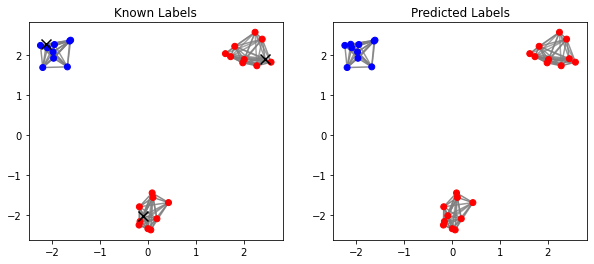

In [26]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# generate some random training data
n = 30
X = np.zeros((n, 2))
X[:10] = np.random.multivariate_normal([2, 2], [[0.1, 0], [0, 0.1]], 10)
X[10:20] = np.random.multivariate_normal([-2, 2], [[0.1, 0], [0, 0.1]], 10)
X[20:] = np.random.multivariate_normal([0, -2], [[0.1, 0], [0, 0.1]], 10)

y = np.zeros(n)
y[:10] = 1
y[10:20] = -1
y[20:] = 1

# Initialize y_known vector with NaN values for unknown labels
y_known = np.full_like(y, np.nan)

# Set known label values for points 1, 5, and 9
known_indices = [3, 13, 23] # index 0 corresponds to point 1, index 4 corresponds to point 5, and so on
y_known[known_indices] = y[known_indices]

# set the hyperparameters
lambd = 1.0
sigma = 1.0

# compute the RBF kernel matrix
K = rbf_kernel(X, gamma=1/(2*sigma**2))

def loss(z, K, y, y_known, lambd):
    n = len(K)
    z = np.array(z)
    y_known_mask = np.isfinite(y_known)
    y_known = np.nan_to_num(y_known)
    y_known = np.array(y_known)
    loss_known = -np.sum(np.log(norm.cdf(y_known[y_known_mask] * z[y_known_mask])), axis=0)
    loss_unknown = -np.sum(np.log(norm.cdf(y[~y_known_mask] * z[~y_known_mask])), axis=0)
    return loss_known + loss_unknown + lambd * np.dot(z, np.dot(np.linalg.inv(K + sigma**2*np.eye(n)), z))

# set the initial guess for z
z0 = np.zeros(n)

# optimize for z
result = minimize(loss, z0, args=(K, y, y_known, lambd), method='BFGS')

# extract the optimized coefficients
z_star = result.x

# compute the optimized function values
f_star = np.dot(K, z_star)

# compute predicted labels
epsilon = np.random.normal(0, 0.3, n)
y_pred = np.sign(f_star + epsilon)

# compute accuracy
accuracy = np.mean(y == y_pred)
print("The accuracy of the predicted labels is given by:", accuracy)

# create the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# add edges according to the RBF kernel
for i in range(n):
    for j in range(i+1, n):
        if K[i,j] > 0.5:
            axs[0].plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color='gray', alpha=K[i,j], zorder=0)
            axs[1].plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color='gray', alpha=K[i,j], zorder=0)

# plot original graph with known labels highlighted
axs[0].scatter(X[np.isnan(y_known), 0], X[np.isnan(y_known), 1], c=y[np.isnan(y_known)], cmap='bwr')
axs[0].scatter(X[~np.isnan(y_known), 0], X[~np.isnan(y_known), 1], c='k', marker='x', s=100, linewidths=1.5)
axs[0].set_title('Known Labels')

# plot predicted labels
axs[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='bwr')
axs[1].set_title('Predicted Labels')

plt.show()

The accuracy of the predicted labels is given by: 1.0


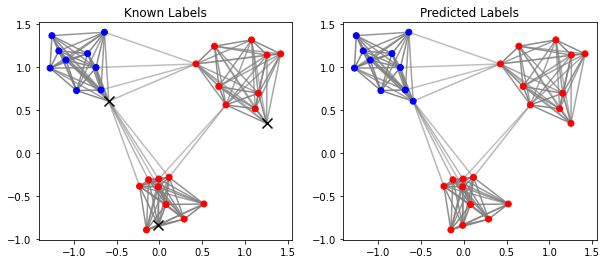

In [35]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# generate some random training data
n = 30
X = np.zeros((n, 2))
X[:10] = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 10)
X[10:20] = np.random.multivariate_normal([-1, 1], [[0.1, 0], [0, 0.1]], 10)
X[20:] = np.random.multivariate_normal([0, -0.5], [[0.1, 0], [0, 0.1]], 10)

y = np.zeros(n)
y[:10] = 1
y[10:20] = -1
y[20:] = 1

# Initialize y_known vector with NaN values for unknown labels
y_known = np.full_like(y, np.nan)

# Set known label values for points 1, 5, and 9
known_indices = [3, 13, 23] # index 0 corresponds to point 1, index 4 corresponds to point 5, and so on
y_known[known_indices] = y[known_indices]

# set the hyperparameters
lambd = 1.0
sigma = 1.0

# compute the RBF kernel matrix
K = rbf_kernel(X, gamma=1/(2*sigma**2))

def loss(z, K, y, y_known, lambd):
    n = len(K)
    z = np.array(z)
    y_known_mask = np.isfinite(y_known)
    y_known = np.nan_to_num(y_known)
    y_known = np.array(y_known)
    loss_known = -np.sum(np.log(norm.cdf(y_known[y_known_mask] * z[y_known_mask])), axis=0)
    loss_unknown = -np.sum(np.log(norm.cdf(y[~y_known_mask] * z[~y_known_mask])), axis=0)
    return loss_known + loss_unknown + lambd *  np.dot(z, np.dot(np.linalg.inv(K + sigma**2*np.eye(n)), z))

# set the initial guess for z
z0 = np.zeros(n)

# optimize for z
result = minimize(loss, z0, args=(K, y, y_known, lambd), method='BFGS')

# extract the optimized coefficients
z_star = result.x

# compute the optimized function values
f_star = np.dot(K, z_star)

# compute predicted labels
epsilon = np.random.normal(0, 0.3, n)
y_pred = np.sign(f_star + epsilon)

# compute accuracy
accuracy = np.mean(y == y_pred)
print("The accuracy of the predicted labels is given by:", accuracy)

# create the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# add edges according to the RBF kernel
for i in range(n):
    for j in range(i+1, n):
        if K[i,j] > 0.5:
            axs[0].plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color='gray', alpha=K[i,j], zorder=0)
            axs[1].plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color='gray', alpha=K[i,j], zorder=0)

# plot original graph with known labels highlighted
axs[0].scatter(X[np.isnan(y_known), 0], X[np.isnan(y_known), 1], c=y[np.isnan(y_known)], cmap='bwr')
axs[0].scatter(X[~np.isnan(y_known), 0], X[~np.isnan(y_known), 1], c='k', marker='x', s=100, linewidths=1.5)
axs[0].set_title('Known Labels')

# plot predicted labels
axs[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='bwr')
axs[1].set_title('Predicted Labels')

plt.show()

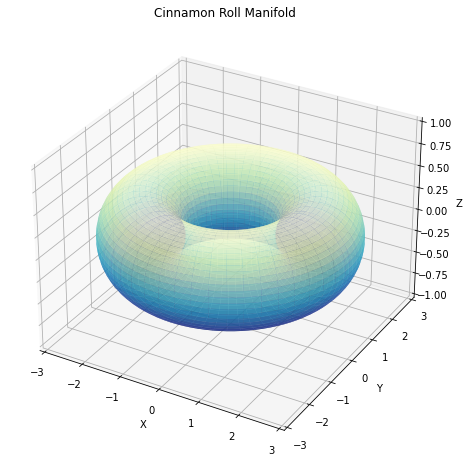

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the parametric equation for the Cinnamon Roll Manifold
def cinnamon_roll(u, v):
    x = (2 + np.cos(u)) * np.cos(v)
    y = (2 + np.cos(u)) * np.sin(v)
    z = np.sin(u) / 2
    return x, y, z

# Create a mesh grid of the (u, v) parameter space
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
u, v = np.meshgrid(u, v)

# Evaluate the parametric equation for each point in the mesh grid
x, y, z = cinnamon_roll(u, v)

# Create a 3D plot of the manifold
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='YlGnBu_r', alpha=0.7)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cinnamon Roll Manifold')
plt.show()

C:\Users\klill\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:234: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\klill\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


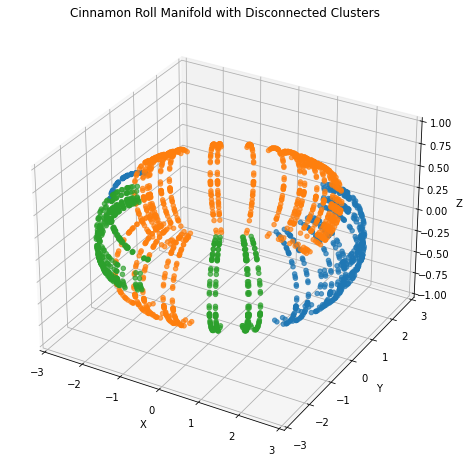

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
import random

# Define the parametric equation for the Cinnamon Roll Manifold
def cinnamon_roll(u, v):
    x = (2 + np.cos(u)) * np.cos(v)
    y = (2 + np.cos(u)) * np.sin(v)
    z = np.sin(u) / 2
    return x, y, z

# Create a mesh grid of the (u, v) parameter space
u = [random.uniform(-np.pi/2, np.pi/2) for _ in range(50)]
v = [random.uniform(0, 2*np.pi) for _ in range(50)]
u, v = np.meshgrid(u, v)

# Evaluate the parametric equation for each point in the mesh grid
x, y, z = cinnamon_roll(u, v)

# Combine the (x, y, z) coordinates into a feature matrix
X = np.column_stack((x.ravel(), y.ravel(), z.ravel()))

# Compute the KNN affinity matrix
K = 10
A = kneighbors_graph(X, K, mode='connectivity', include_self=True)

# Perform clustering on the feature matrix using Spectral Clustering
n_clusters = 3
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = sc.fit_predict(A)

# Create a 3D plot of the manifold with clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    idx = np.where(labels==i)[0]
    ax.scatter(x.ravel()[idx], y.ravel()[idx], z.ravel()[idx], alpha=0.7)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cinnamon Roll Manifold with Disconnected Clusters')
plt.show()